In [4]:
import flavio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
!pip install flavio

  Using cached flavio-2.3.1.tar.gz (900 kB)
  Using cached ckmutil-0.3.2.tar.gz (6.3 kB)
  Using cached wilson-2.2.1-py3-none-any.whl (554 kB)
  Using cached particle-0.16.1-py2.py3-none-any.whl (230 kB)
     |████████████████████████████████| 118 kB 105 kB/s 
  Using cached pylha-0.4.tar.gz (54 kB)
  Using cached voluptuous-0.12.2.tar.gz (48 kB)
  Using cached hepunits-2.1.2-py2.py3-none-any.whl (10 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Created wheel for flavio: filename=flavio-2.3.1-py3-none-any.whl size=1007057 sha256=0ab4c29ef65ff18ffbd120f9cbee68e2316847d492a058587d6c67257d20d0f1
  Stored in directory: /Users/oskar/Library/Caches/pip/wheels/11/96/33/55515ae101cf1e9d78a25f48d768c7b551206fc8f20ddc6d9b
  Created wheel for ckmutil: filename=ckmutil-0.3.2-py3-none-any.whl size=8234 sha256=d8592060aab0faa7917b585e0673c07561035ccfc205edbe234c400f371b41d9
  Stored in directory: /Users/oskar/Library/Caches/pip/wheels/31/ad/e7/7170b72074234404566382728604c86cd

In [3]:
import xgboost

In [15]:
scene1=pd.read_csv('data/toy_data_c9_-0.46_c10_0.46_2021_10_29_13.csv', index_col=0)
scene2=pd.read_csv('data/toy_data_c9_-0.91_c10_0.18_2021_10_29_12.csv', index_col=0)
scene3=pd.read_csv('data/toy_data_c9_0_c10_0_2021_10_29_11.csv', index_col=0)

scene1['dataset'] = ['1'] * scene1.shape[0]
scene2['dataset'] = ['2'] * scene2.shape[0]
scene3['dataset'] = ['0'] * scene3.shape[0]

for scene in [scene1, scene2, scene3]:
    scene['k'] = np.cos(scene['k'])
    scene['l'] = np.cos(scene['l'])

In [6]:
from sklearn.manifold import TSNE

In [16]:
combined = pd.concat([scene1, scene2, scene3])

In [30]:
X_embedded = TSNE(n_components=2, perplexity=3).fit_transform(combined[['q2', 'k', 'l', 'p']])

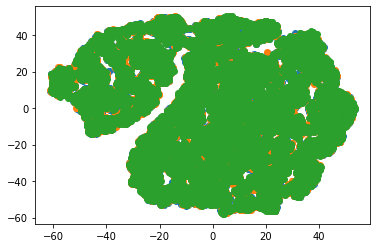

In [32]:
plt.scatter(X_embedded[combined['dataset'] == '1', 0], X_embedded[combined['dataset'] == '1', 1])
plt.scatter(X_embedded[combined['dataset'] == '2', 0], X_embedded[combined['dataset'] == '2', 1])
plt.scatter(X_embedded[combined['dataset'] == '0', 0], X_embedded[combined['dataset'] == '0', 1])

# Try classifying the datasets

In [17]:
features = ['q2','k','l','p']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(combined[features], combined[['dataset']], test_size=0.3)

In [20]:
model = xgboost.XGBClassifier()

In [21]:
model.fit(X_train, y_train.astype(int))

/Users/oskar/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/oskar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[17:10:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [22]:
model.score(X_test, y_test.astype(int))

0.3368753113066578